In [1]:
import numpy as np
import pandas as pd
from speedboot import speedboot

##### You are given a random sample of size n from a population

In [2]:
n = 1000
n_sample = pd.DataFrame({"age": np.random.normal(50,10,n),
                         "height": np.random.normal(1.7,.2,n),
                         "weight": np.random.normal(65,10,n)})
n_sample.head()

,age,height,weight
0,65.029501,1.390105,63.621251
1,50.860779,1.496451,57.702164
2,48.858412,1.505691,66.638032
3,49.387821,1.872077,70.197793
4,42.663926,1.672120,63.379535


##### Using this sample you wish to estimate the mean age and mean BMI for the population form which we are sampling

In [3]:
def estimators(X):
    '''Estimators for the mean age and mean BMI of a population'''
    return np.array([np.mean(X['age']), np.mean(X['weight']/X['height']**2)])

(age_hat, bmi_hat) = estimators(n_sample)

print(f'estimated mean age is {age_hat:.2f}')
print(f'estimated mean BMI is {bmi_hat:.2f}')

estimated mean age is 50.08
estimated mean BMI is 23.53


##### Instanciate speedboot with the sample and the estimator function

In [4]:
speedboot_object = speedboot(data=n_sample, stats_fun=estimators)

##### Run the bootstrap with 999 iterations

In [5]:
speedboot_object.fit(R=999, bar=True, seed=123)

100%|██████████| 999/999 [00:00<00:00, 1576.93it/s]


##### Parallelize computations for speed

In [6]:
speedboot_object.fit(R=999, bar=True, par=True, seed=123)

100%|██████████| 999/999 [00:01<00:00, 667.21it/s]


##### Recover point estimates

In [7]:
speedboot_object.ests

array([50.07854704, 23.53082357])

##### Recover bootstrap estimates

In [8]:
pd.DataFrame(speedboot_object.ests_boot, columns=['age_hats', 'BMI_hats'])

,age_hats,BMI_hats
0,50.100795,23.479206
1,49.822383,23.291611
2,50.284064,23.355431
3,49.721238,23.771810
4,50.180666,23.736557
...,...,...
994,50.152615,23.453912
995,50.359907,23.954353
996,49.872353,23.447262
997,49.232385,23.874705


##### Plot histograms for normality check

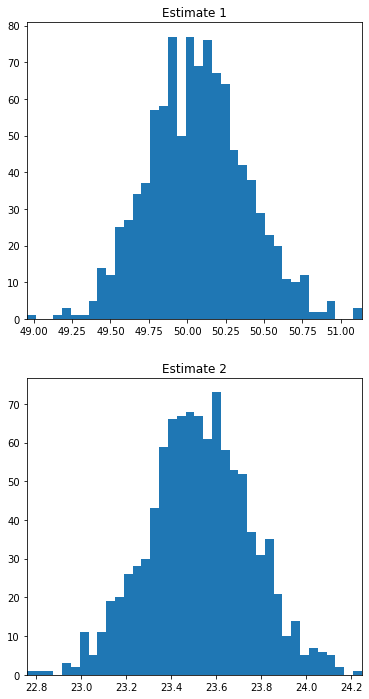

In [9]:
speedboot_object.plot(prec=.04, size=6)

##### Compute 90% percentile confidence intervals

In [10]:
speedboot_object.per_ci(alpha=.1)

array([[49.56054101, 50.60164068],
       [23.1419558 , 23.89278421]])

##### Compute 90% empirical confidence intervals

In [11]:
speedboot_object.emp_ci(alpha=.1)

array([[49.55545339, 50.59655306],
       [23.16886293, 23.91969134]])